In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from src.utils import *

## Preprocessing 

In [2]:
df = pd.read_excel('data.xlsx', engine='openpyxl')
df.head(20)

,ctx,codice_dm,lista_id,pers_sesso,pers_eta_ingresso_in_lista,diagnosi,diagnosi_specifica,eltr,lista_ingresso_data,tot_tx_organo,...,donatore_HBeAg,donatore_HBeAb,donatore_antiCoreTot,donatore_hbv_dna,donatore_hcv_rna,donatore_steatosiMacro,donatore_biopsiaEpatica,donatore_biopsiaRenale,donatore_livelloRischioPreLT,donatore_variazioneLivello
0,BOLOGNA,12898,20412,M,54,Altra epatopatia,NaN,NaN,2004-03-10,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOLOGNA,12908,20422,M,64,Cirrosi postnecrotica da HCV,NaN,NaN,2003-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BOLOGNA,12909,20423,M,56,Cirrosi criptogenetica o idiopatica,NaN,D11 : Cirrhosis-Cryptogenic (unknown) cirrhosis,2002-07-18,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOLOGNA,12913,20428,M,51,Cirrosi di Laennec (post-alcolica),NaN,NaN,2003-06-26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BOLOGNA,12935,20450,M,43,Cirrosi postnecrotica da HCV,NaN,NaN,2004-01-08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BOLOGNA,12937,20452,F,63,Epatocarcinoma associato a cirrosi,NaN,NaN,2003-12-29,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BOLOGNA,12939,20454,F,55,Cirrosi biliare primitiva,NaN,NaN,2003-10-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BOLOGNA,12958,20473,M,63,Cirrosi postnecrotica da HCV,NaN,NaN,2003-07-31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,BOLOGNA,12961,20476,M,62,Cirrosi postnecrotica da HBV HbsAg positiva,NaN,NaN,2003-07-24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BOLOGNA,12964,20479,M,43,Cirrosi postnecrotica da HCV,NaN,NaN,2004-02-23,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['diagnosi'].value_counts()

Epatocarcinoma associato a cirrosi                                                              708
Cirrosi postnecrotica da HCV                                                                    425
Cirrosi di Laennec (post-alcolica)                                                              249
Ritrapianto/rigetto di trapianto epatico                                                         90
Cirrosi postnecrotica da HBV HbsAg positiva                                                      72
Cirrosi postnecrotica da coinfezione HBV + HDV                                                   67
Cirrosi criptogenetica o idiopatica                                                              64
Altra epatopatia                                                                                 58
Cirrosi di Laennec associata a cirrosi postnecrotica                                             52
Cirrosi biliare primitiva                                                                        48


In [4]:
missing_percent = {}
for column in df.columns:
    missing_percent[column] = df[column].isna().sum() / len(df)
for column in sorted(missing_percent, key=missing_percent.get, reverse=True):
    print('{}: {:.3f}'.format(column, missing_percent[column]))

Na: 1.000
fega_note: 0.999
donatore_diabete_insulinodipendente_desc: 0.999
donatore_bassaportata3_PAmin: 0.998
donatore_bassaportata3_data: 0.997
donatore_bassaportata3_ora: 0.997
donatore_bassaportata3_durata: 0.997
donatore_bassaportata3_PAmax: 0.997
donatore_bassaportata3_trattamento: 0.997
ISO2_tipo_super_urgenza: 0.997
donatore_bassaportata2_PAmin: 0.995
donatore_bassaportata2_PAmax: 0.993
donatore_bassaportata2_durata: 0.991
donatore_bassaportata2_ora: 0.990
donatore_bassaportata2_trattamento: 0.990
scheda48h_tipo_tx_effettivo_combinato: 0.989
donatore_biopsiaRenale: 0.989
donatore_bassaportata2_data: 0.988
donatore_note: 0.980
categoria_HCC: 0.977
diagnosi_specifica: 0.974
donatore_diabete_desc: 0.974
donatore_dislipidemie_desc: 0.970
trombosi_portale_note: 0.969
ISO2_Ecc. MELD: 0.969
donatore_bassaportata1_PAmin: 0.958
donatore_variazioneLivello: 0.954
tipo_combinato: 0.944
ric_eccezione_MELD_PELD: 0.944
donatore_bassaportata1_PAmax: 0.939
donatore_HBeAg: 0.939
donatore_bassapo

In [5]:
columns = ['BMI', 'MELD_base',
           'pers_sesso', 'ric_diabete',
           'ric_HCV', 'data_trapianto',
           'data_decesso', 'data_ultimo_agg_followup',
           'pers_eta_ingresso_in_lista', 'HCC',
           'trombosi_portale', 'ric_HBsAg',
           'UNOS', 'ric_HIV', 'lista_ingresso_data',
           'chirurgia_addom', 'iscriz_tx_comb', 
           'lista_uscita_data', 'causa_uscita'] 
           #'MELD_in_ingresso', 'MELD_in_uscita']

categories = ['pers_sesso', 'ric_diabete',
              'ric_HCV', 'HCC', 'trombosi_portale',
              'ric_HBsAg', 'UNOS', 'ric_HIV',
              'chirurgia_addom', 'iscriz_tx_comb']

# column that need to be explained: CHILD, UNOS, diagnosi, codice dm, causa_uscita

In [6]:
df = df[columns]
df = pd.get_dummies(df, columns=categories, drop_first=True)
df['deceased'] = np.zeros(len(df)) 
df['transplanted'] = np.zeros(len(df))
#df['ultimo_aggiornamento'] = df['data_decesso']

df.head(50)
# how do we handle patients in the list that do not have data_trapianto and data_decesso
# what does 'Non idonea clinicamente' mean?

,BMI,MELD_base,data_trapianto,data_decesso,data_ultimo_agg_followup,pers_eta_ingresso_in_lista,lista_ingresso_data,lista_uscita_data,causa_uscita,pers_sesso_M,...,trombosi_portale_SI,ric_HBsAg_SI,UNOS_2A,UNOS_2B,UNOS_3,ric_HIV_SI,chirurgia_addom_SI,iscriz_tx_comb_SI,deceased,transplanted
0,25.16,8.0,2004-10-22,2013-08-01,NaT,54,2004-03-10,2004-10-22,TX nel centro di iscrizione,1,...,0,0,0,1,0,0,0,1,0.0,0.0
1,27.76,10.0,NaT,NaT,NaT,64,2003-12-02,2010-01-12,Non idoneo clinicamente,1,...,0,0,0,1,0,0,1,0,0.0,0.0
2,26.49,13.0,NaT,NaT,NaT,56,2002-07-18,2016-06-09,Uscito per miglioramento,1,...,0,0,0,1,0,0,0,0,0.0,0.0
3,25.54,14.0,NaT,2004-01-28,NaT,51,2003-06-26,2004-01-28,Deceduto iscritto in lista,1,...,0,0,0,1,0,0,0,0,0.0,0.0
4,21.47,16.0,NaT,2005-06-11,NaT,43,2004-01-08,2005-06-11,Deceduto iscritto in lista,1,...,0,0,0,0,1,0,0,0,0.0,0.0
5,22.15,19.0,2004-12-01,2006-05-15,NaT,63,2003-12-29,2004-12-01,TX nel centro di iscrizione,0,...,0,0,0,1,0,0,1,0,0.0,0.0
6,18.36,13.0,NaT,2004-08-25,NaT,55,2003-10-02,2004-08-25,Deceduto iscritto in lista,0,...,0,0,0,1,0,0,1,0,0.0,0.0
7,27.94,21.0,NaT,2005-02-18,NaT,63,2003-07-31,2005-02-18,Deceduto iscritto in lista,1,...,0,0,0,1,0,0,0,0,0.0,0.0
8,24.57,16.0,NaT,NaT,NaT,62,2003-07-24,2006-09-21,Non idoneo clinicamente,1,...,1,1,0,0,0,0,1,0,0.0,0.0
9,NaN,18.0,2004-03-22,2004-03-22,NaT,43,2004-02-23,2004-03-22,TX nel centro di iscrizione,1,...,0,0,0,1,0,0,0,0,0.0,0.0


Persone non trapiantate, ma in lista d'attesa

* In lista d'attesa

* Deceduto in lista d'attesa

* In lista d'attesa e uscito perche migliorato

In [7]:
for index, row in df.iterrows():
    if not row['data_trapianto'] is pd.NaT:
        df.at[index, 'transplanted'] = 1
    elif not row['data_decesso'] is pd.NaT:
        df.at[index, 'deceased'] = 1
    elif row['data_decesso'] is pd.NaT:
        df.at[index, 'data_decesso'] = row['lista_uscita_data']
        
        
df_list = df[df['transplanted'] == 0]
df_list['tos_list'] = (df['data_decesso'] - df['lista_ingresso_data']).dt.days / 30
df_list[df_list['deceased'] == 1]

<ipython-input-7-ec83954ceea9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['tos_list'] = (df['data_decesso'] - df['lista_ingresso_data']).dt.days / 30


,BMI,MELD_base,data_trapianto,data_decesso,data_ultimo_agg_followup,pers_eta_ingresso_in_lista,lista_ingresso_data,lista_uscita_data,causa_uscita,pers_sesso_M,...,ric_HBsAg_SI,UNOS_2A,UNOS_2B,UNOS_3,ric_HIV_SI,chirurgia_addom_SI,iscriz_tx_comb_SI,deceased,transplanted,tos_list
3,25.54,14.0,NaT,2004-01-28,NaT,51,2003-06-26,2004-01-28,Deceduto iscritto in lista,1,...,0,0,1,0,0,0,0,1.0,0.0,7.200000
4,21.47,16.0,NaT,2005-06-11,NaT,43,2004-01-08,2005-06-11,Deceduto iscritto in lista,1,...,0,0,0,1,0,0,0,1.0,0.0,17.333333
6,18.36,13.0,NaT,2004-08-25,NaT,55,2003-10-02,2004-08-25,Deceduto iscritto in lista,0,...,0,0,1,0,0,1,0,1.0,0.0,10.933333
7,27.94,21.0,NaT,2005-02-18,NaT,63,2003-07-31,2005-02-18,Deceduto iscritto in lista,1,...,0,0,1,0,0,0,0,1.0,0.0,18.933333
14,24.24,14.0,NaT,2004-08-18,NaT,52,2001-08-08,2004-08-18,Deceduto iscritto in lista,0,...,0,0,1,0,0,0,0,1.0,0.0,36.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,26.95,23.0,NaT,2020-01-16,NaT,30,2019-09-25,2020-01-16,Deceduto iscritto in lista,0,...,0,0,1,0,0,1,1,1.0,0.0,3.766667
2234,23.44,39.0,NaT,2019-10-13,NaT,45,2019-10-09,2019-10-11,Non idoneo clinicamente,0,...,0,0,0,0,0,1,0,1.0,0.0,0.133333
2235,33.41,48.0,NaT,2020-01-05,NaT,59,2019-10-19,2019-10-25,Uscito per miglioramento,1,...,0,0,0,0,0,0,0,1.0,0.0,2.600000
2237,28.09,8.0,NaT,2020-10-05,NaT,62,2019-10-25,2020-10-05,Deceduto iscritto in lista,1,...,0,0,1,0,0,1,0,1.0,0.0,11.533333


In [8]:
df_list = df_list.drop(['data_decesso', 'data_trapianto', 'data_ultimo_agg_followup', 'lista_ingresso_data', 'lista_uscita_data', 'causa_uscita', 'transplanted'], axis=1)

In [9]:
#df_list = df_list.dropna()
df_list = df_list.dropna()

Text(0, 0.5, 'count patients')

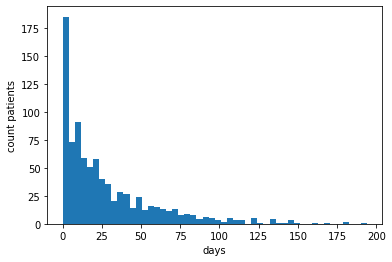

In [10]:
plt.hist(df_list['tos_list'], bins=50)
plt.xlabel('days')
plt.ylabel('count patients')

In [11]:
X = df_list.drop(['tos_list', 'deceased'], axis=1)
y = df_list[['tos_list', 'deceased']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(y_train.min(), y_train.max())

tos_list    0.0
deceased    0.0
dtype: float64 tos_list    179.033333
deceased      1.000000
dtype: float64


Epoch 1/200
5/5 [==============================] - 1s 2ms/step - loss: 1677.5989
Epoch 2/200
5/5 [==============================] - 0s 68ms/step - loss: 1591.0234
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 1382.5081
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 749.7678
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 343.7733
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 347.2494
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 369.2585
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 360.9103
Epoch 9/200
5/5 [==============================] - 0s 1ms/step - loss: 334.7975
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 300.8564
Epoch 11/200
5/5 [==============================] - 0s 1ms/step - loss: 283.5013
Epoch 12/200
5/5 [==============================] - 0s 1ms/step - loss: 284.0321
Epoch 13/200
5/5 [===============

5/5 [==============================] - 0s 1ms/step - loss: 248.1908
Model: "survival_nn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  272       
                                                                 
 dense_1 (Dense)             multiple                  544       
                                                                 
 dense_2 (Dense)             multiple                  1056      
                                                                 
 dense_3 (Dense)             multiple                  33        
                                                                 
Total params: 1,907
Trainable params: 1,905
Non-trainable params: 2
_________________________________________________________________
None


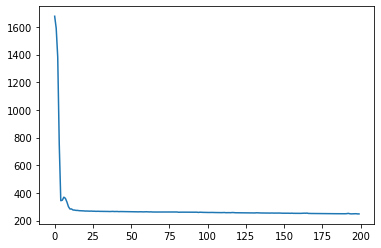

In [12]:
model = SurvivalNN(len(X.iloc[0]), hidden=[32, 32])
model.compile(optimizer='Adam')
history = model.fit(X_train.astype('float32'), y_train.astype('float32'), batch_size=128, epochs=200, verbose=1)
print(model.summary())
plt.plot(history.history['loss'])
plt.show()

Text(0, 0.5, 'count patients')

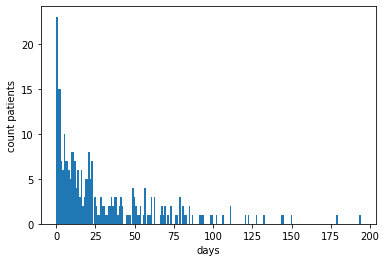

In [13]:
plt.hist(y_test['tos_list'], bins=200)
plt.xlabel('days')
plt.ylabel('count patients')

Text(0, 0.5, 'count patients')

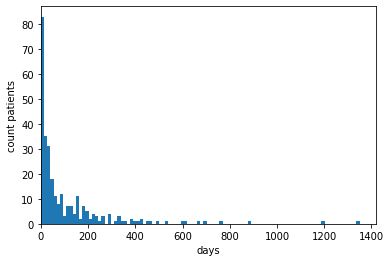

In [14]:
from scipy.special import expit
from scipy.stats import nbinom

logits = model.predict(X_test).ravel()
n = 1
p = 1 - expit(logits)
dist = nbinom(n, p)
plt.hist(nbinom.rvs(n, p, size=285), bins=100)
#plt.xlim(right=200)
plt.xlim(left=0)
plt.xlabel('days')
plt.ylabel('count patients')

In [15]:
from sklearn.metrics import mutual_info_score
mutual_info_score(nbinom.rvs(n, p, size=285), y_test['tos_list'])

/home/fbaldo/anaconda3/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


4.521335913914924

In [16]:
import scipy 

def jensen_shannon_distance(p, q):
    """
    method to compute the Jenson-Shannon Distance 
    between two probability distributions
    """

    # convert the vectors into numpy arrays in case that they aren't
    p = np.array(p)
    q = np.array(q)

    # calculate m
    m = (p + q) / 2

    # compute Jensen Shannon Divergence
    divergence = (scipy.stats.entropy(p, m) + scipy.stats.entropy(q, m)) / 2

    # compute the Jensen Shannon Distance
    distance = np.sqrt(divergence)

    return distance

In [17]:
jensen_shannon_distance(dist.mean(), y_test['tos_list'])

0.4309686102308973

In [18]:
from lifelines.statistics import logrank_test
res = logrank_test(nbinom.rvs(1, 1-p, size=285), y_test['tos_list'])
res.p_value
res.test_statistic
res.summary

,test_statistic,p,-log2(p)
0,569.869186,5.994766e-126,415.979236
